In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import load_house_data
from lab_utils_common import dlc

np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')
plt.rcParams['font.sans-serif'] = ['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号


In [2]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']


In [4]:
scaler=StandardScaler()
X_norm=scaler.fit_transform(X_train)
print(f"未标准化X的峰值到峰值范围：{np.ptp(X_train,axis=0)}")
print(f"z-score标准化X的峰值到峰值范围：{np.ptp(X_norm,axis=0)}")

未标准化X的峰值到峰值范围：[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
z-score标准化X的峰值到峰值范围：[5.85 6.14 2.06 3.69]


In [6]:
sgdr=SGDRegressor(max_iter=1000)
sgdr.fit(X_norm,y_train)
print(sgdr)
print(f"完成的迭代次数:{sgdr.n_iter_},权重更新次数：{sgdr.t_}")

SGDRegressor()
完成的迭代次数:108,权重更新次数：10693.0


In [8]:
b_norm=sgdr.intercept_
w_norm=sgdr.coef_
print(f"w:{w_norm},b:{b_norm}")
print("以前实验室的模型参数: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")



w:[109.89 -20.9  -32.28 -38.11],b:[363.15]
以前实验室的模型参数: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


In [16]:
y_pred_sgd=sgdr.predict(X_norm)
y_pred=np.dot(X_norm,w_norm)+b_norm
# print(f"y_pred_sgd={y_pred_sgd},\ny_pred={y_pred}")
print(f"sgd和np.dot值是否匹配：{(y_pred_sgd==y_pred).all()}")
print(f"y_pred_sgd={y_pred_sgd[:4]}")
print(f"目标值={y_train[:4]}")

sgd和np.dot值是否匹配：True
y_pred_sgd=[295.15 485.92 389.7  492.08]
目标值=[300.  509.8 394.  540. ]


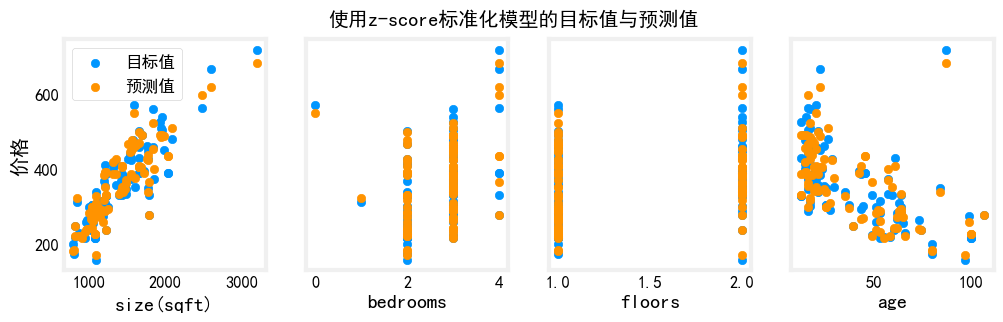

In [19]:
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train,label='目标值')
    ax[i].scatter(X_train[:,i],y_pred_sgd,label='预测值')
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("价格")
ax[0].legend()
fig.suptitle("使用z-score标准化模型的目标值与预测值")
plt.show()